In [68]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram

In [69]:
wine = load_wine()
y = wine.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [70]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(wine.data)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [71]:
km_labels = kmeans_model.labels_
km_labels

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

In [72]:
print(f"Homogeneity: {metrics.homogeneity_score(y, km_labels):.3f}")
print(f"Completeness: {metrics.completeness_score(y, km_labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(y, km_labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, km_labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(y, km_labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(wine.data, km_labels):.3f}")

Homogeneity: 0.429
Completeness: 0.429
V-measure: 0.429
Adjusted Rand Index: 0.371
Adjusted Mutual Information: 0.423
Silhouette Coefficient: 0.571


In [73]:
predictions = kmeans_model.predict(wine.data)
predictions

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

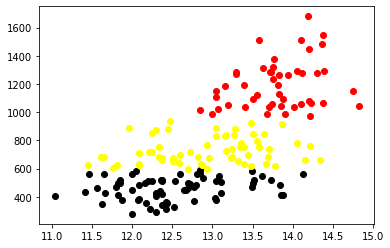

In [74]:
cluster_0 = wine.data[predictions == 0]
cluster_1 = wine.data[predictions == 1]
cluster_2 = wine.data[predictions == 2]
plt.scatter(cluster_0[:,0] , cluster_0[:,12] , color = 'red')
plt.scatter(cluster_1[:,0] , cluster_1[:,12] , color = 'black')
plt.scatter(cluster_2[:,0] , cluster_2[:,12] , color = 'yellow')

In [75]:
cluster_0

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.420e+01, 1.760e+00, 2.450e+00, 1.520e+01, 1.120e+02, 3.270e+00,
        3.390e+00, 3.400e-01, 1.970e+00, 6.750e+00, 1.050e+00, 2.850e+00,
        1.450e+03],
       [1.439e+01, 1.870e+00, 2.450e+00, 1.460e+01, 9.600e+01, 2.500e+00,
        2.520e+00, 3.000e-01, 1.980e+00, 5.250e+00, 1.020e+00, 3.580e+00,
        1.29

In [76]:
cluster_2

array([[1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02],
       [1.364e+01, 3.100e+00, 2.560e+00, 1.520e+01, 1.160e+02, 2.700e+00,
        3.030e+00, 1.700e-01, 1.660e+00, 5.100e+00, 9.600e-01, 3.360e+00,
        8.450e+02],
       [1.406e+01, 1.630e+00, 2.280e+00, 1.600e+01, 1.260e+02, 3.000e+00,
        3.170e+00, 2.400e-01, 2.100e+00, 5.650e+00, 1.090e+00, 3.710e+00,
        7.800e+02],
       [1.293e+01, 3.800e+00, 2.650e+00, 1.860e+01, 1.020e+02, 2.410e+00,
        2.410e+00, 2.500e-01, 1.980e+00, 4.500e+00, 1.030e+00, 3.520e+00,
        7.700e+02],
       [1.350e+01, 1.810e+00, 2.610e+00, 2.000e+01, 9.600e+01, 2.530e+00,
        2.610e+00, 2.800e-01, 1.660e+00, 3.520e+00, 1.120e+00, 3.820e+00,
        8.450e+02],
       [1.305e+01, 2.050e+00, 3.220e+00, 2.500e+01, 1.240e+02, 2.630e+00,
        2.680e+00, 4.700e-01, 1.920e+00, 3.580e+00, 1.130e+00, 3.200e+00,
        8.30

In [104]:
dbscan = DBSCAN(eps=50, min_samples=5)
dbscan.fit(wine.data)

DBSCAN(eps=50)

In [105]:
pca = PCA(n_components=2).fit(wine.data)
pca_2d = pca.transform(wine.data)

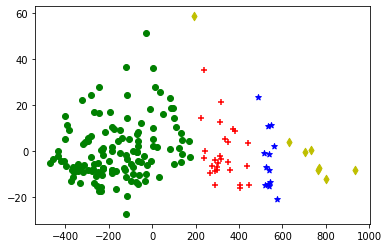

In [106]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='d')

In [107]:
labels = dbscan.labels_
labels

array([ 0,  0,  0, -1,  1, -1,  2,  2,  0,  0, -1,  2,  2,  0, -1,  2,  2,
        0, -1,  1,  1,  1,  0,  0,  1,  1,  0,  2,  1,  0,  2, -1,  0,  2,
        0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  0,  0,  2,  0,
        2,  0, -1,  0,  0,  0,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [108]:
print(f"Homogeneity: {metrics.homogeneity_score(y, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(y, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(y, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(y, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(wine.data, labels):.3f}")

Homogeneity: 0.334
Completeness: 0.429
V-measure: 0.375
Adjusted Rand Index: 0.241
Adjusted Mutual Information: 0.363
Silhouette Coefficient: 0.555


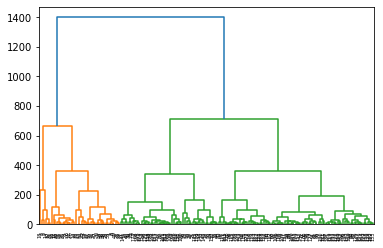

In [82]:
mergings = linkage(wine.data, method='complete')
clusters = dendrogram(mergings,leaf_rotation=90)